In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets, linear_model
import pandas as pd


# ボストンデータセットを読み込む
boston_d = datasets.load_boston()

# データのattributeの確認
boston_d.keys()

dict_keys(['data', 'DESCR', 'feature_names', 'target'])

In [20]:
# データの説明文
print(boston_d.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [23]:
print(boston_d.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [24]:
print(boston_d.target)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [12]:
# pandas
boston = pd.DataFrame(boston_d.data)
boston.columns = boston_d.feature_names

# targetをデータテーブルに足す
boston["PRICE"] = boston_d.target

# データのあらましを確認
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/take/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


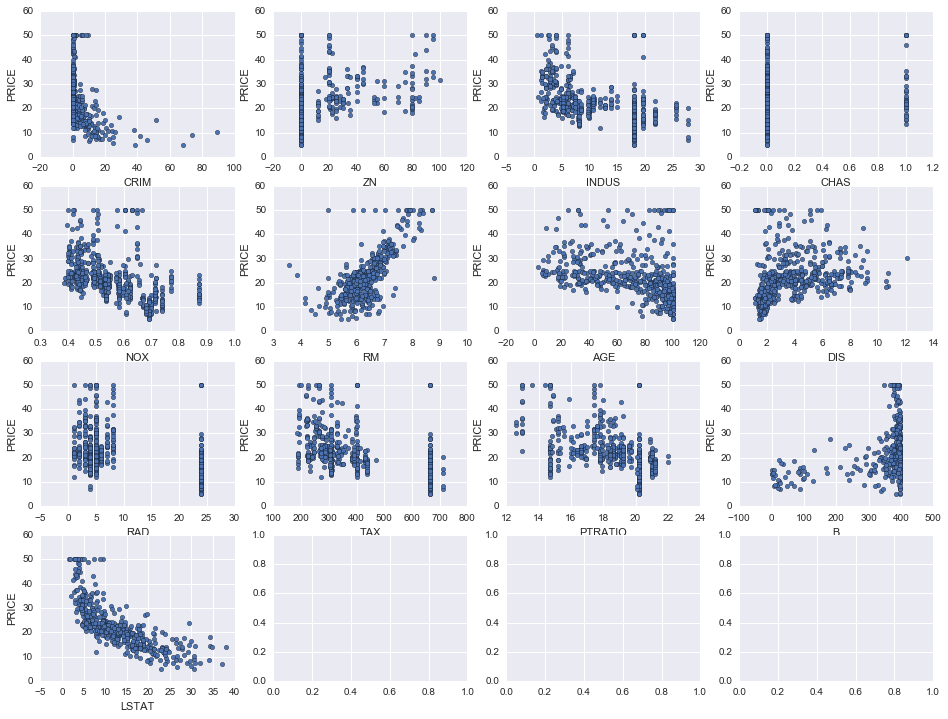

In [13]:
# 全体的なグラフのプロット
_, axes = plt.subplots(4, 4, figsize=(16, 12))
for i in range(0,len(boston.keys())-1):
    boston.plot.scatter(x=boston.keys()[i], y="PRICE", ax=axes[i / 4, i % 4])


In [25]:
# データに関するstatsを表示
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# 部屋の数を取り出す
X = boston["RM"]

# 家の値段を取り出す
Y = boston["PRICE"]

# このままだと506個の数字列のままなので、[[1],[2],...]のように二次元配列に変換
X = X.reshape((len(X), 1))
X.shape

(506, 1)

In [26]:
# 線形回帰のモデル宣言
# http://bigdataexaminer.com/uncategorized/how-to-run-linear-regression-in-python-scikit-learn/
reg = linear_model.LinearRegression()

# 線形回帰の実行
reg.fit(X,Y)

print("coefficient : %f , intercept : %f" % (reg.coef_, reg.intercept_))

# つまり
print("PRICE = %f * RM + %f" % (reg.coef_, reg.intercept_))

print("決定係数 R^2 : %f" % reg.score(X,Y))
print("Residual sum of squares : %f" % np.mean((reg.predict(X) - Y) ** 2))

coefficient : 9.102109 , intercept : -34.670621
PRICE = 9.102109 * RM + -34.670621
決定係数 R^2 : 0.483525
Residual sum of squares : 43.600552


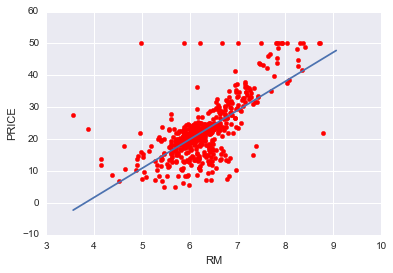

In [27]:
# グラフを表示する
plt.scatter(X, Y, color='r')

# 得られた直線をプロットする
## プロットしたい幅を決定する [最小値 , 最大値 + 0.5]を0.5刻みで与える
x_plot = np.arange(X.min(), X.max()+0.5 ,0.5)

## 2次元配列に変換
x_plot = x_plot.reshape((len(x_plot), 1))

## 与えられたx_plotを元に直線の式を計算してplot
plt.plot(x_plot, reg.predict(x_plot))

## その他のラベルなどを出力
plt.xlabel("RM")
plt.ylabel("PRICE")

In [60]:
# multiple regression(重回帰)を行う
# http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Notes/IPython%20Notebook%20-%20Regression.html
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor


In [65]:
# 今回はxは二重配列になってる
x = np.array([np.concatenate((v,[1])) for v in boston_d.data])
y = boston_d.target
print(x)

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   3.96900000e+02
    4.98000000e+00   1.00000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   3.96900000e+02
    9.14000000e+00   1.00000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   3.92830000e+02
    4.03000000e+00   1.00000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   3.96900000e+02
    5.64000000e+00   1.00000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   3.93450000e+02
    6.48000000e+00   1.00000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   3.96900000e+02
    7.88000000e+00   1.00000000e+00]]


In [66]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)
# scikit-learnの重回帰は早いがstepwiseが実装されていない

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
# 学習したモデルの切片
print(linreg.intercept_)

36.4911032804


In [85]:
# 学習したモデルの係数
print(linreg.coef_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01   0.00000000e+00]


In [72]:
predict=linreg.predict(x)
err = abs(p-y)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# RMSE = 最小二乗誤差の平方根
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

4.68570791668


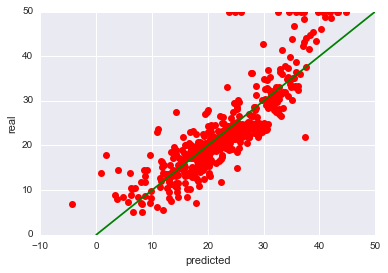

In [76]:
# Plot outputs
plt.plot(predict, y,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()


In [94]:
# 交差検定でRMSEを計測
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [95]:
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on training: 4.6857
RMSE on 10-fold CV: 5.8819


In [98]:
# 線形回帰は特徴量に比べてサンプル数が少ないと過学習しやすく、精度が大幅に悪化するという欠点がある
# 訓練データ数が少なくて過学習するときは様々な正則化（regularization）テクニックが使える
# メリット:ridgeは過学習を抑えることができる
# デメリット:モデルが複雑になりやすい

# alpha0.5でRidgeをためす
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [101]:
# 訓練データのRMSEを計算
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

In [104]:
# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    ridge.fit(x[train],y[train])
    p = ridge.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 4.6977
RMSE on 10-fold CV: 5.8428


In [105]:
# Lasso
# 疎な解を得やすい(いくつかの係数が０になりやすい)
# 次元削減できるのでモデルが単純になる
# 過学習を抑制する能力は弱い

# alpha0.5でRidgeをためす
lasso = Lasso(fit_intercept=True, alpha=0.5)

# Train the model using the training set
lasso.fit(x,y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
# 訓練データのRMSEを計算
p = lasso.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

In [109]:
# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    lasso.fit(x[train],y[train])
    p = lasso.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Lasso Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Lasso Regression
RMSE on training: 4.9141
RMSE on 10-fold CV: 5.7368


In [108]:
# TODO:アルファはグリッドサーチで調節するらしい
# TODO:ridge,lasso,elastic netをどう選択するか

# ▼document
# http://scikit-learn.org/stable/modules/linear_model.html
# ▼alphaを変えてみた場合とかlinear regression,lasso,ridge,elastic-netを比較した場合など
# http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Notes/IPython%20Notebook%20-%20Regression.html
# ▼日本語ページ
# http://momijiame.tumblr.com/post/115202866516/python-boston-%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%81%A7%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%82%92%E5%AD%A6%E3%81%B6
